In [72]:
!pip install matplotlib
!pip install seaborn

In [73]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay

In [75]:
data = pd.read_csv("Medicaldataset.csv")

In [76]:
data.head()

Age  Gender  Heart rate  Systolic blood pressure  Diastolic blood pressure  \
0   63       1          66                      160                        83   
1   20       1          94                       98                        46   
2   56       1          64                      160                        77   
3   66       1          70                      120                        55   
4   54       1          64                      112                        65   

   Blood sugar  CK-MB  Troponin    Result  
0        160.0   1.80     0.012  negative  
1        296.0   6.75     1.060  positive  
2        270.0   1.99     0.003  negative  
3        270.0  13.87     0.122  positive  
4        300.0   1.08     0.003  negative

In [77]:
data.shape

(1319, 9)

### Check data then clean data luh

In [78]:
print(data.dtypes)

Age                           int64
Gender                        int64
Heart rate                    int64
Systolic blood pressure       int64
Diastolic blood pressure      int64
Blood sugar                 float64
CK-MB                       float64
Troponin                    float64
Result                       object
dtype: object


In [79]:
data.head(10)

Age  Gender  Heart rate  Systolic blood pressure  Diastolic blood pressure  \
0   63       1          66                      160                        83   
1   20       1          94                       98                        46   
2   56       1          64                      160                        77   
3   66       1          70                      120                        55   
4   54       1          64                      112                        65   
5   52       0          61                      112                        58   
6   38       0          40                      179                        68   
7   61       1          60                      214                        82   
8   49       0          60                      154                        81   
9   65       1          61                      160                        95   

   Blood sugar   CK-MB  Troponin    Result  
0        160.0    1.80     0.012  negative  
1        296.0    6.75     1.060  positive  
2        270.0    1.99     0.003  negative  
3        270.0   13.87     0.122  positive  
4        300.0    1.08     0.003  negative  
5         87.0    1.83     0.004  negative  
6        102.0    0.71     0.003  negative  
7         87.0  300.00     2.370  positive  
8        135.0    2.35     0.004  negative  
9        100.0    2.84     0.011  negative

### Check null data (untuk tahu mana data yg kosong)

In [80]:
data.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

### Added a new feature called Pulse Pressure

In [81]:
data['Pulse pressure'] = (data['Systolic blood pressure'] - data['Diastolic blood pressure']).abs()

### Replacing Result field with binary output ( untuk jadikan int senang nk olah nanti)

In [82]:
results = {
    "positive": 1,
    "negative": 0
}
data["Result"] = data["Result"].map(results)

In [83]:
data.head()

Age  Gender  Heart rate  Systolic blood pressure  Diastolic blood pressure  \
0   63       1          66                      160                        83   
1   20       1          94                       98                        46   
2   56       1          64                      160                        77   
3   66       1          70                      120                        55   
4   54       1          64                      112                        65   

   Blood sugar  CK-MB  Troponin  Result  Pulse pressure  
0        160.0   1.80     0.012       0              77  
1        296.0   6.75     1.060       1              52  
2        270.0   1.99     0.003       0              83  
3        270.0  13.87     0.122       1              65  
4        300.0   1.08     0.003       0              47

### Histogram plots to check distribution of data

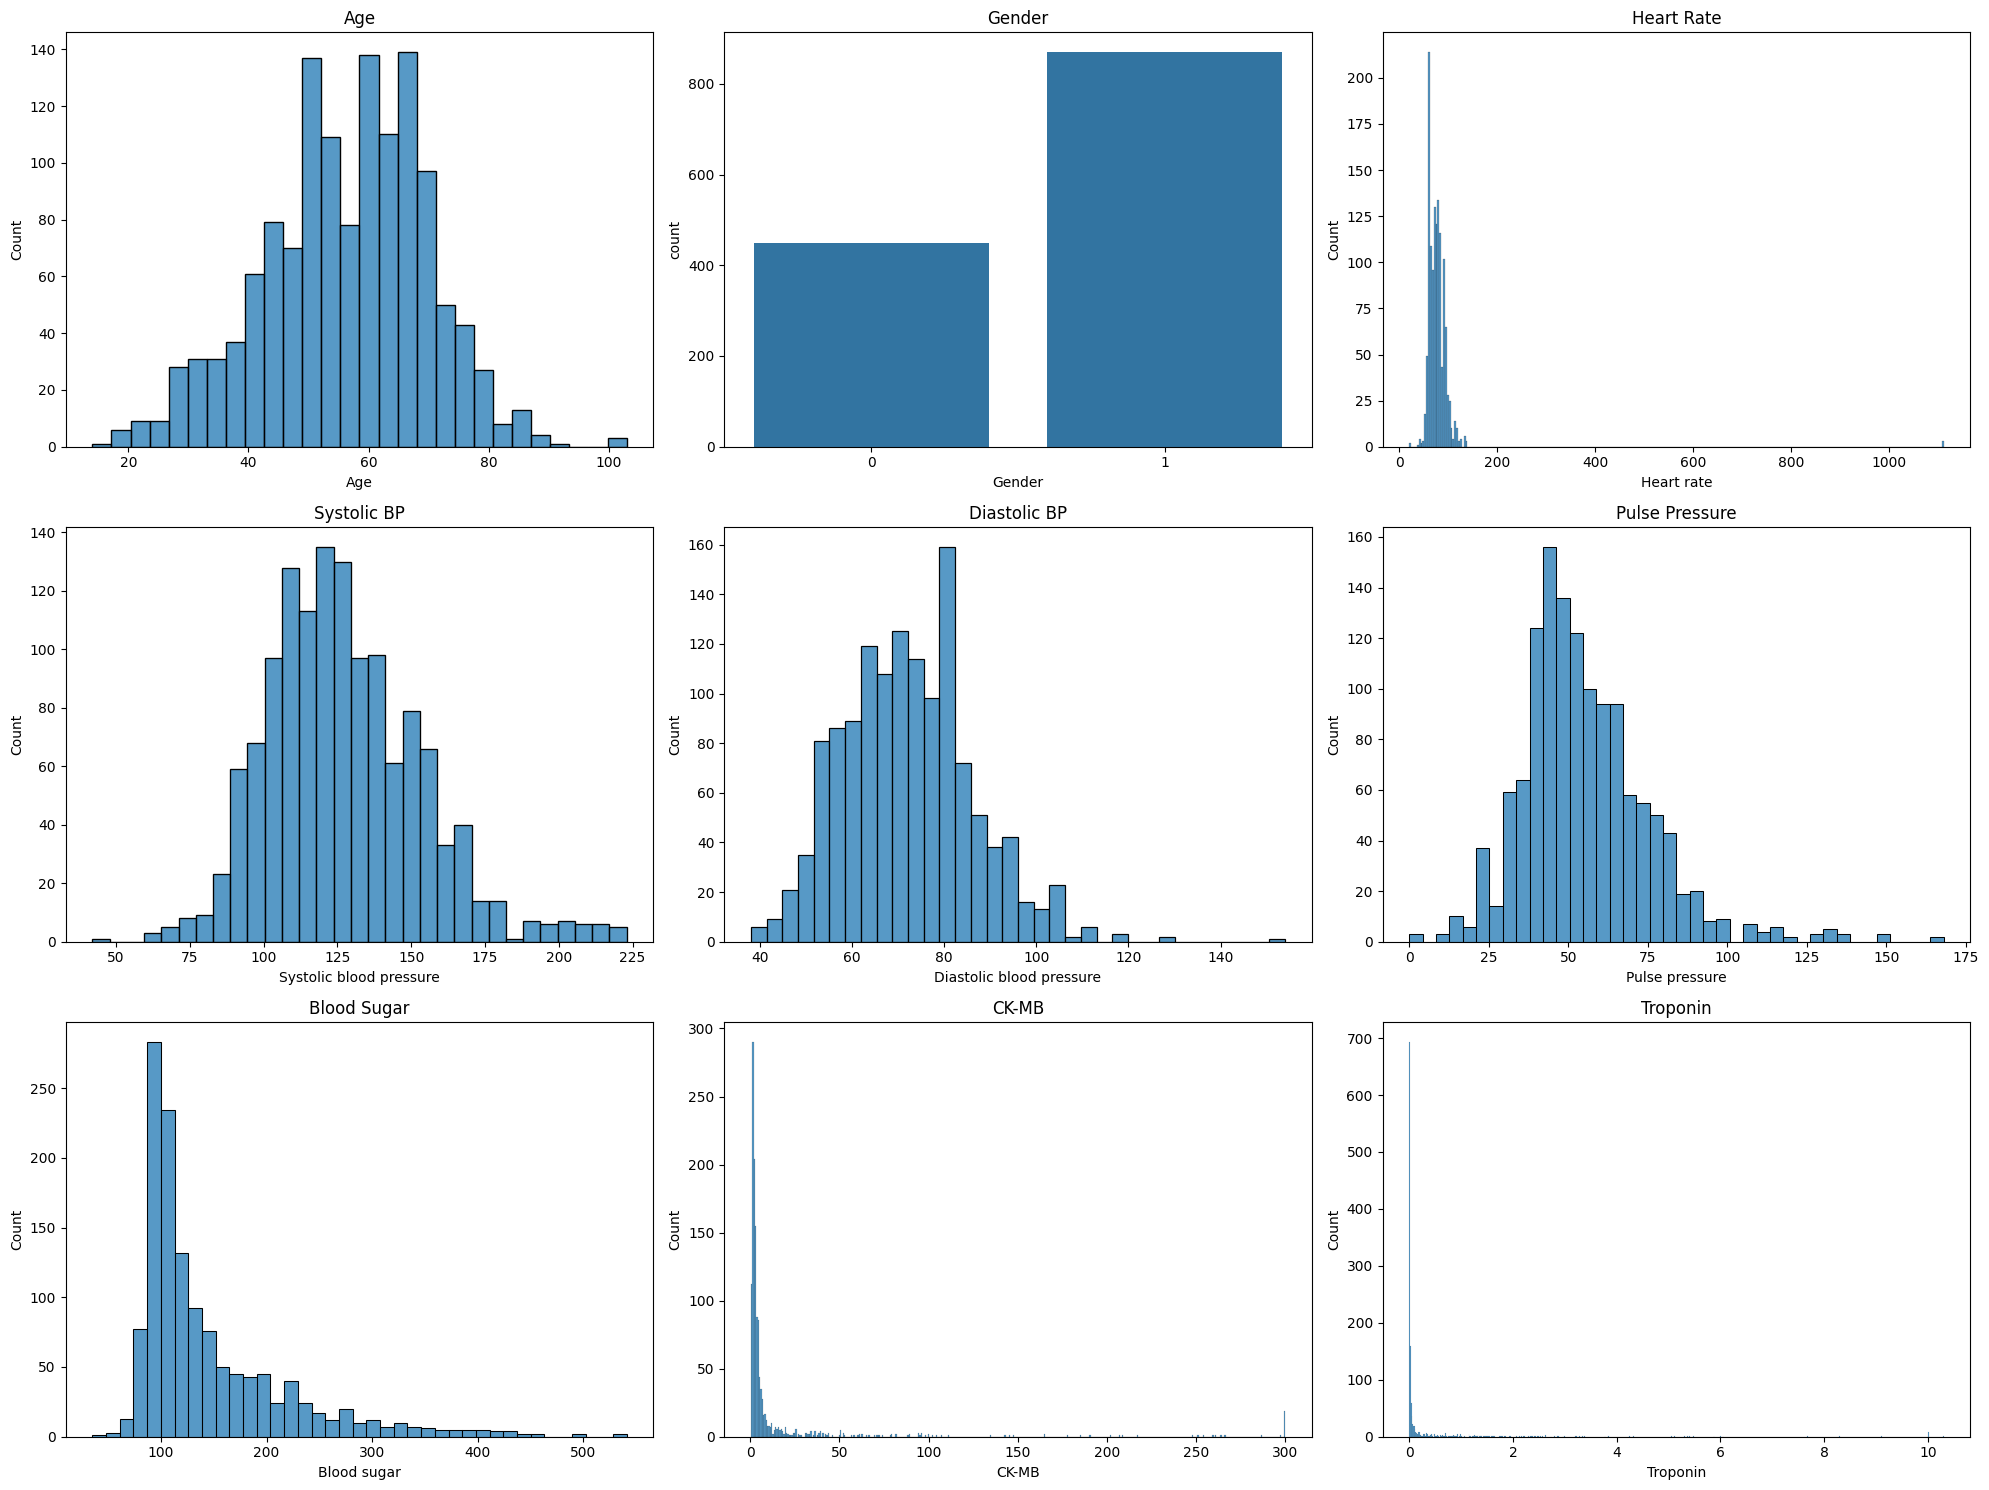

In [84]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

# Age
sns.histplot(data['Age'], ax=axes[0, 0])
axes[0, 0].set_title('Age')

# Gender
sns.countplot(x='Gender', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Gender')

# Heart Rate
sns.histplot(data['Heart rate'], ax=axes[0, 2])
axes[0, 2].set_title('Heart Rate')

# Systolic BP
sns.histplot(data['Systolic blood pressure'], ax=axes[1, 0])
axes[1, 0].set_title('Systolic BP')

# Diastolic BP
sns.histplot(data['Diastolic blood pressure'], ax=axes[1, 1])
axes[1, 1].set_title('Diastolic BP')

# Pulse Pressure
sns.histplot(data['Pulse pressure'], ax=axes[1, 2])
axes[1, 2].set_title('Pulse Pressure')

# Blood Sugar
sns.histplot(data['Blood sugar'], ax=axes[2, 0])
axes[2, 0].set_title('Blood Sugar')

# CK-MB
sns.histplot(data['CK-MB'], ax=axes[2, 1])
axes[2, 1].set_title('CK-MB')

# Troponin
sns.histplot(data['Troponin'], ax=axes[2, 2])
axes[2, 2].set_title('Troponin')

plt.tight_layout()
plt.show()

In [85]:
print(data["CK-MB"].max())
print(data["Troponin"].max())

300.0
10.3


### Removing Extreme values

In [86]:
# List of columns where we want to limit the range of values
columns_to_limit = ['Heart rate', "Diastolic blood pressure", "Systolic blood pressure"]

# Loop through each column specified in 'columns_to_limit'
for column in columns_to_limit:
    # Calculate the 1st percentile (lower bound) for the column
    lower = data[column].quantile(0.01)
    
    # Calculate the 99th percentile (upper bound) for the column
    upper = data[column].quantile(0.99)
    
    # Limit the values in the column to lie between the 1st and 99th percentiles (removes extreme outliers)
    data[column] = data[column].clip(lower=lower, upper=upper)


### CK-MB values usually remain under 50 but I have limited them to be 100 max as some cases have them go up

In [87]:
# Define an upper limit for 'CK-MB' column to avoid extreme values
ckmb_upper = 100
# Clip values in the 'CK-MB' column to ensure they do not exceed the upper limit of 100
data['CK-MB'] = data['CK-MB'].clip(upper=ckmb_upper)

# Define an upper limit for 'Blood sugar' column to avoid extreme values
bs_upper = 350
# Clip values in the 'Blood sugar' column to ensure they do not exceed the upper limit of 350
data["Blood sugar"] = data["Blood sugar"].clip(upper=bs_upper)

# Define an upper limit for 'Troponin' column to avoid extreme values
# Troponin is a protein in the blood, and a very high value may indicate a severe condition.
data["Troponin"] = data["Troponin"].clip(upper=1)


In [88]:
print(data.dtypes)

Age                           int64
Gender                        int64
Heart rate                    int64
Systolic blood pressure       int64
Diastolic blood pressure    float64
Blood sugar                 float64
CK-MB                       float64
Troponin                    float64
Result                        int64
Pulse pressure                int64
dtype: object


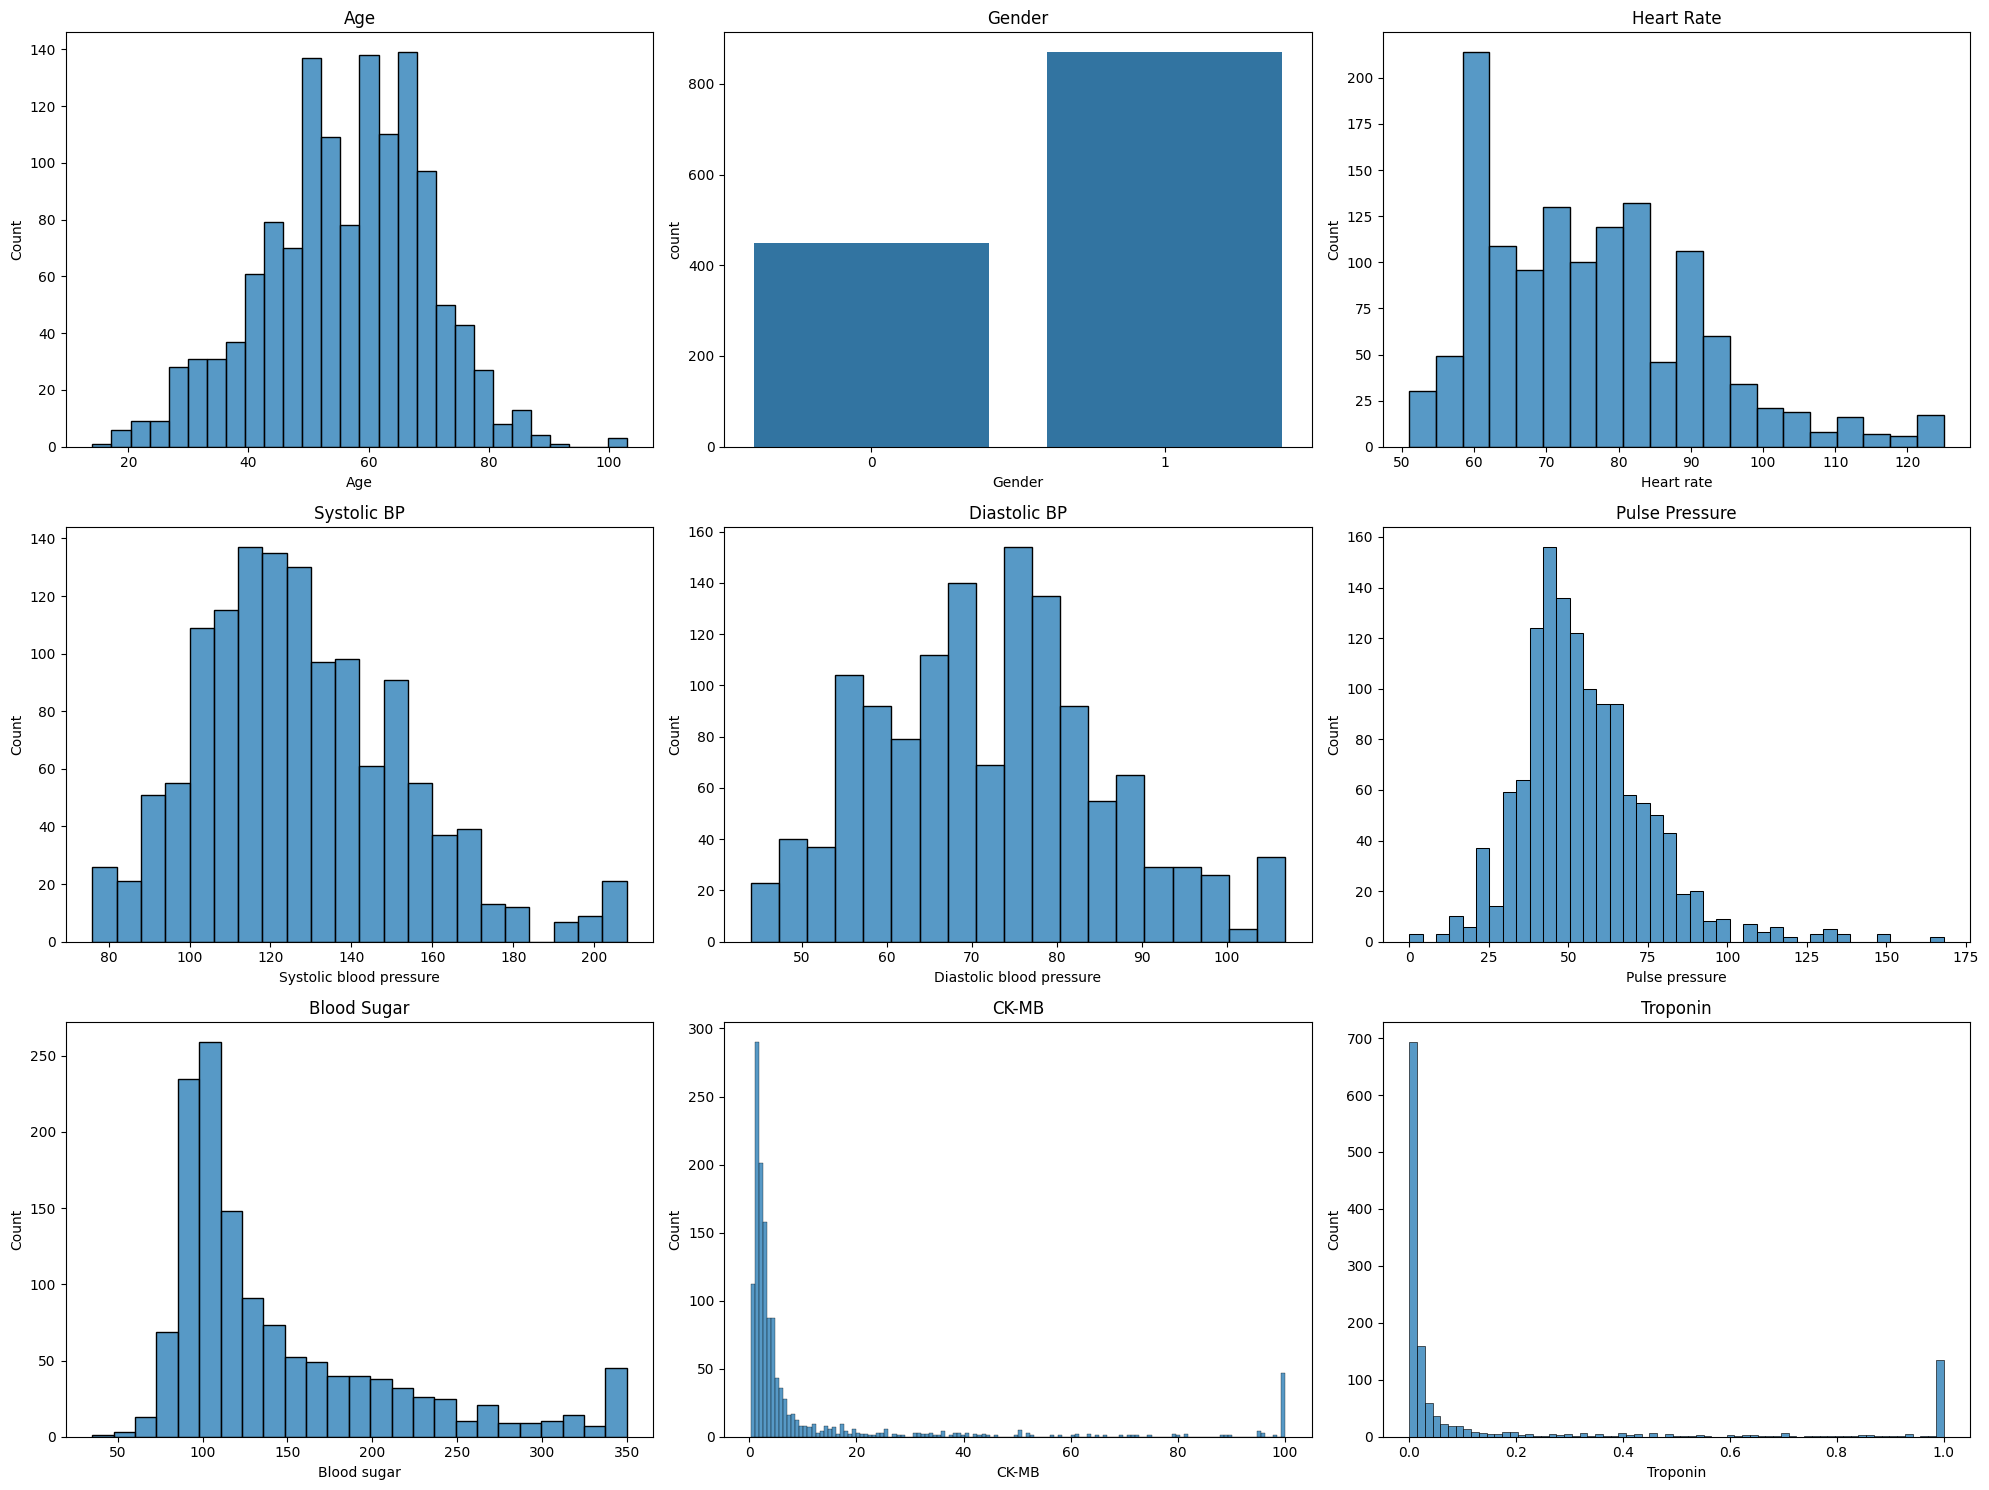

In [89]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

# Age
sns.histplot(data['Age'], ax=axes[0, 0])
axes[0, 0].set_title('Age')

# Gender
sns.countplot(x='Gender', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Gender')

# Heart Rate
sns.histplot(data['Heart rate'], ax=axes[0, 2])
axes[0, 2].set_title('Heart Rate')

# Systolic BP
sns.histplot(data['Systolic blood pressure'], ax=axes[1, 0])
axes[1, 0].set_title('Systolic BP')

# Diastolic BP
sns.histplot(data['Diastolic blood pressure'], ax=axes[1, 1])
axes[1, 1].set_title('Diastolic BP')

# Pulse Pressure
sns.histplot(data['Pulse pressure'], ax=axes[1, 2])
axes[1, 2].set_title('Pulse Pressure')

# Blood Sugar
sns.histplot(data['Blood sugar'], ax=axes[2, 0])
axes[2, 0].set_title('Blood Sugar')

# CK-MB
sns.histplot(data['CK-MB'], ax=axes[2, 1])
axes[2, 1].set_title('CK-MB')

# Troponin
sns.histplot(data['Troponin'], ax=axes[2, 2])
axes[2, 2].set_title('Troponin')

plt.tight_layout()
plt.show()

### Used MinMax Scaler which gives values from 0 to 1 for better results

In [90]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data = scaled_data

In [91]:
data.head()

Age  Gender  Heart rate  Systolic blood pressure  \
0  0.550562     1.0    0.202703                 0.636364   
1  0.067416     1.0    0.581081                 0.166667   
2  0.471910     1.0    0.175676                 0.636364   
3  0.584270     1.0    0.256757                 0.333333   
4  0.449438     1.0    0.175676                 0.272727   

   Diastolic blood pressure  Blood sugar     CK-MB  Troponin  Result  \
0                  0.620821     0.396825  0.014838  0.011011     0.0   
1                  0.031837     0.828571  0.064497  1.000000     1.0   
2                  0.525310     0.746032  0.016744  0.002002     0.0   
3                  0.175103     0.746032  0.135926  0.121121     1.0   
4                  0.334288     0.841270  0.007614  0.002002     0.0   

   Pulse pressure  
0        0.458333  
1        0.309524  
2        0.494048  
3        0.386905  
4        0.279762

In [92]:
x= data.drop(columns=['Result'])  
y = data['Result'] 

### Testing Size can be 30:70 of our whole dataset

In [93]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3)

In [94]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K

tf.random.set_seed(638)

### Sequential MLP Model

In [95]:
# Set the input shape to the number of features in the training set
input_shape = x_train.shape[1]

# Clear any previous session to reset the model state
K.clear_session()

# Define a Sequential neural network model
model = Sequential([
    # First hidden layer with 64 neurons and ReLU activation
    Dense(64, input_shape=(input_shape,), activation='relu'),
    # Second hidden layer with 32 neurons and ReLU activation
    Dense(32, activation='relu'),
    # Third hidden layer with 16 neurons and ReLU activation
    Dense(16, activation='relu'),
    # Output layer with 1 neuron and sigmoid activation for binary classification
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer, binary crossentropy loss, and accuracy as a metric
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model on the training data with 60 epochs and a batch size of 32
# Use 20% of the data for validation
training = model.fit(x_train, y_train, epochs=60, batch_size=32, validation_split=0.2)

# Initialize threshold and best accuracy
g_thres = 0.5  # Starting threshold for classification
best_accuracy = 0  # Track the highest accuracy found

# Iterate 100 times to find the best threshold
for _ in range(100):
    # Randomly generate a threshold value between 0.4 and 0.8
    # np.random.rand() generates a random number between 0 and 1
    # (0.8 - 0.4) scales the random number to a range of 0 to 0.4
    # Adding 0.4 shifts the range to be between 0.4 and 0.8
    thres = np.random.rand() * (0.8 - 0.4) + 0.4
    # Predict using the model and apply the threshold for classification
    y_pred = (model.predict(x_train) > thres).astype(int)
    # Calculate the accuracy using the current threshold
    acc = accuracy_score(y_train, y_pred)
    # Update the best accuracy and corresponding threshold if current accuracy is better
    if acc > best_accuracy:
        best_accuracy = acc
        g_thres = thres

# Print the best threshold and corresponding accuracy
print(f"Best threshold: {g_thres}")
print(f"Best training accuracy: {best_accuracy * 100:.2f}%")

# Use the best threshold to make predictions on the test set
y_pred_test = (model.predict(x_test) > g_thres).astype(int)

# Evaluate the test accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
# Display the classification report for detailed performance metrics
print("Classification Report:\n", classification_report(y_test, y_pred_test))


Epoch 1/60
24/24 [==============================] - 2s 21ms/step - loss: 0.6884 - accuracy: 0.5285 - val_loss: 0.6454 - val_accuracy: 0.6378
Epoch 2/60
24/24 [==============================] - 0s 5ms/step - loss: 0.6430 - accuracy: 0.6138 - val_loss: 0.6022 - val_accuracy: 0.6378
Epoch 3/60
24/24 [==============================] - 0s 6ms/step - loss: 0.6005 - accuracy: 0.6138 - val_loss: 0.5462 - val_accuracy: 0.6486
Epoch 4/60
24/24 [==============================] - 0s 5ms/step - loss: 0.5593 - accuracy: 0.6369 - val_loss: 0.4964 - val_accuracy: 0.7189
Epoch 5/60
24/24 [==============================] - 0s 5ms/step - loss: 0.5147 - accuracy: 0.7141 - val_loss: 0.4565 - val_accuracy: 0.7838
Epoch 6/60
24/24 [==============================] - 0s 5ms/step - loss: 0.4841 - accuracy: 0.7818 - val_loss: 0.4312 - val_accuracy: 0.7946
Epoch 7/60
24/24 [==============================] - 0s 5ms/step - loss: 0.4735 - accuracy: 0.7642 - val_loss: 0.4388 - val_accuracy: 0.7514
Epoch 8/60
24/24 [=

### Random Forest Model

In [96]:
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier from sklearn

# Create a Random Forest model
# n_estimators=100: The number of trees in the forest
# max_depth=10: The maximum depth of each tree to prevent overfitting
# random_state=42: Sets a seed for reproducibility of the results
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the Random Forest model using the training data
rf_model.fit(x_train, y_train)

# Predict the labels of the test data
y_pred = rf_model.predict(x_test)

# Calculate and display the accuracy of the model on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Print the classification report, which provides precision, recall, F1-score, and support for each class
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print the confusion matrix to show the performance in terms of true positives, true negatives, false positives, and false negatives
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Test Accuracy: 98.48%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       157
         1.0       1.00      0.98      0.99       239

    accuracy                           0.98       396
   macro avg       0.98      0.99      0.98       396
weighted avg       0.99      0.98      0.98       396

Confusion Matrix:
 [[156   1]
 [  5 234]]


In [97]:
# Random Forest Metrics
accuracy_rf = round(accuracy_score(y_test, y_pred), 3)
precision_rf = round(precision_score(y_test, y_pred), 3)
recall_rf = round(recall_score(y_test, y_pred), 3)
f1_rf = round(f1_score(y_test, y_pred), 3)
roc_auc_rf = round(roc_auc_score(y_test, y_pred), 3)

# Sequential Model Metrics
accuracy_seq = round(accuracy_score(y_test, y_pred_test), 3)
precision_seq = round(precision_score(y_test, y_pred_test), 3)
recall_seq = round(recall_score(y_test, y_pred_test), 3)
f1_seq = round(f1_score(y_test, y_pred_test), 3)
roc_auc_seq = round(roc_auc_score(y_test, y_pred_test), 3)

metrics = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"],
    "Random Forest": [accuracy_rf, precision_rf, recall_rf, f1_rf, roc_auc_rf],
    "Sequential Model": [accuracy_seq, precision_seq, recall_seq, f1_seq, roc_auc_seq]
}

dataframe_metrics = pd.DataFrame(metrics)
print(dataframe_metrics)

      Metric  Random Forest  Sequential Model
0   Accuracy          0.985             0.902
1  Precision          0.996             0.927
2     Recall          0.979             0.908
3   F1 Score          0.987             0.918
4    ROC-AUC          0.986             0.900


Accuracy: Correct predictions made by model

Precision: Ratio of true positive predictions to total positive predictions by model

Recall: Ratio of true positive predictions to actual positives

F1 Score: Harmonic mean of Precision and Recall (useful when classes are imbalanced)

ROC-AUC: Distinguishing between classes done by model

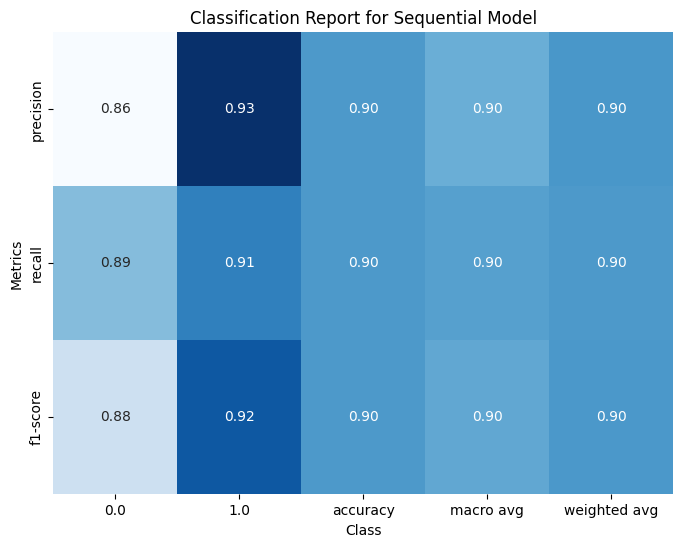

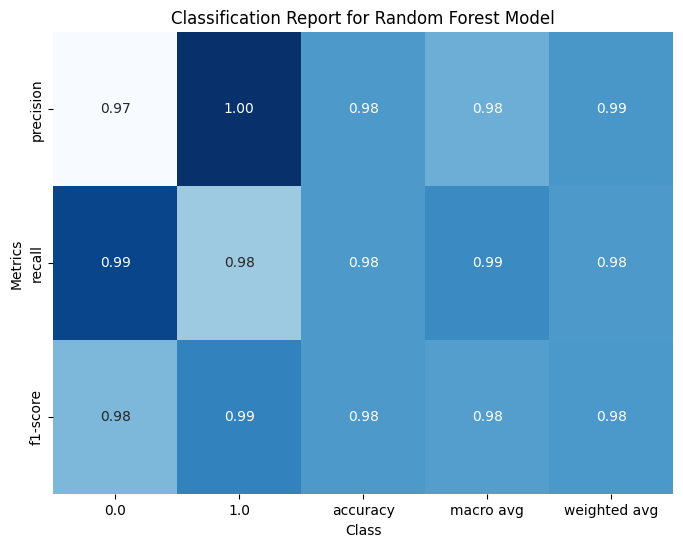

In [98]:
report_seq = classification_report(y_test, y_pred_test, output_dict=True)
df_seq = pd.DataFrame(report_seq).transpose()

#select precision, recall, and f1-score
df_seq = df_seq[['precision', 'recall', 'f1-score']].iloc[:].T

plt.figure(figsize=(8, 6))
sns.heatmap(df_seq, annot=True, cmap="Blues", cbar=False, fmt=".2f")
plt.title("Classification Report for Sequential Model")
plt.xlabel("Class")
plt.ylabel("Metrics")
plt.show()


report_rf = classification_report(y_test, y_pred, output_dict=True)
df_rf = pd.DataFrame(report_rf).transpose()
df_rf = df_rf[['precision', 'recall', 'f1-score']].iloc[:].T

plt.figure(figsize=(8, 6))
sns.heatmap(df_rf, annot=True, cmap="Blues", cbar=False, fmt=".2f")
plt.title("Classification Report for Random Forest Model")
plt.xlabel("Class")
plt.ylabel("Metrics")
plt.show()

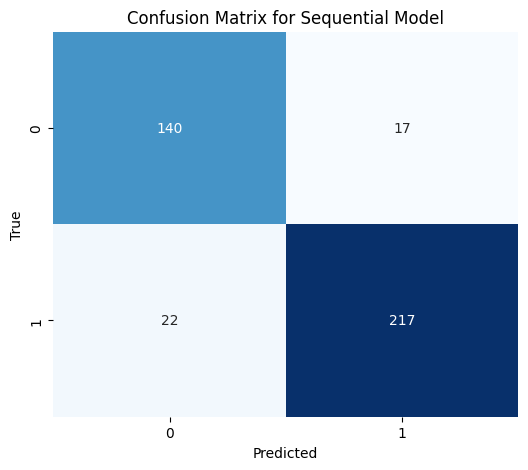

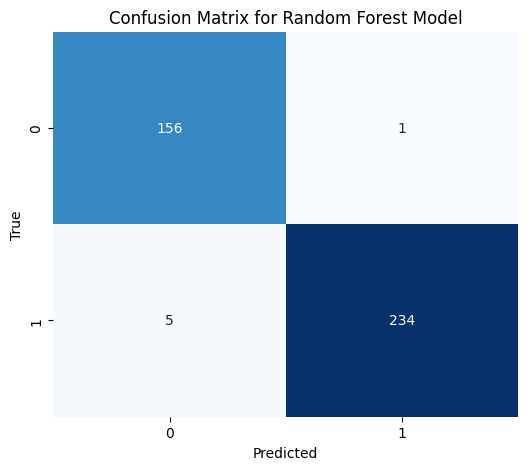

In [99]:
cm_seq = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_seq, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Sequential Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


cm_rf = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Random Forest Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### Logistic Regression

In [100]:
from sklearn.linear_model import LogisticRegression

print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of x_train: (923, 9)
Shape of y_train: (923,)


In [101]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (1055, 9)
Shape of y_train: (1055,)
Shape of x_test: (264, 9)
Shape of y_test: (264,)


In [102]:
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [103]:
print("x_train length:", len(x_train))
print("y_train length:", len(y_train))

x_train length: 1055
y_train length: 1055


In [104]:
# Define the logistic regression model
log_reg = LogisticRegression()

# Fit the model with training data
log_reg.fit(x_train, y_train)

LogisticRegression()

In [105]:
# Make predictions
y_pred = log_reg.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

Accuracy: 0.7992424242424242

Confusion Matrix:
 [[ 72  29]
 [ 24 139]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.71      0.73       101
         1.0       0.83      0.85      0.84       163

    accuracy                           0.80       264
   macro avg       0.79      0.78      0.79       264
weighted avg       0.80      0.80      0.80       264

